<a href="https://colab.research.google.com/github/hbowden-arch/WSP_2024/blob/main/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 3: Supernova Light Curves**

Big Questions:


*   What is a light curve?
*   What can you learn about a supernova by looking at its lightcurve?


Additional goals:


*   Use python to do your own calculations
*   Make your own plot in python



---

# Following up from last time:

RA & Dec simulator: https://astro.unl.edu/classaction/animations/coordsmotion/radecdemo.html

# Reviewing Light Curves

Visit the interactive light curve explorer at https://astro.unl.edu/naap/distance/animations/snCurveExplorer.html.

Adjust the various supernova so that the observed points fall on the standard light curve for a Type Ia supernova.

Then, see if you can figure out how to use the absolute magnitude (left axis) and the apparent magnitude (left axis) to figure out how far away the supernova was from us.

# Making a plot with Python

In [1]:
x_array = [1,2,3,4,5] #This is an array in python. It is
y_array = [1,3,7,9,3]

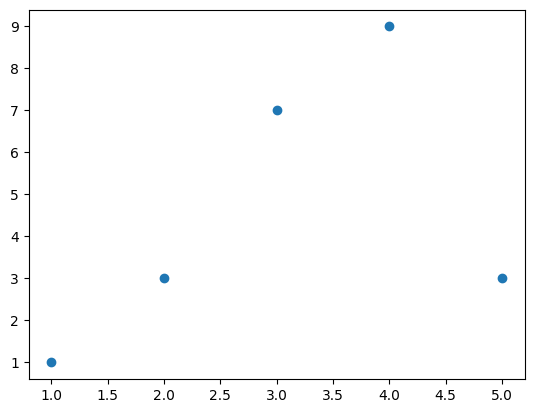

In [2]:
#First let's import the plotting package that we will use going forward
#matplotlib is a library of plotting tools that we can use out of the box
import matplotlib.pyplot as plt #The name of the package is a bit long so here we're shortening it to 'plt' for us to use later
#You only have to run this line once and then we can use all the plotting tools we need by calling 'plt'


#To plot our points with x-coordinates from x_array and y-coordinates from y_array
#we use a function called plt.scatter() and put our arrays inside the parenthesis separated by a commma
plt.scatter(x_array,y_array)

#Go ahead and run the cell once now.


#If we wanted to plot lines connecting the points we can use plt.plot() instead of plt.scatter()
#Try adding a '#' before the plt.scatter() line above and removing it from the line below to plot lines instead of points.

#plt.plot(x_array,y_array)

We don't want to just plot a bunch of random points though, we are scientists, so we want to plot data! This means that our numbers have meaning and units.

As an example, let's say we have a group of six elementary school students and we want to know how their heights (in inches) are related to their ages (in years).

When we make our plot, we want someone looking at it to know immediately what they are looking at. This means labeling our axes and adding a title or caption to give context.

Text(0, 0.5, 'Height [Inches]')

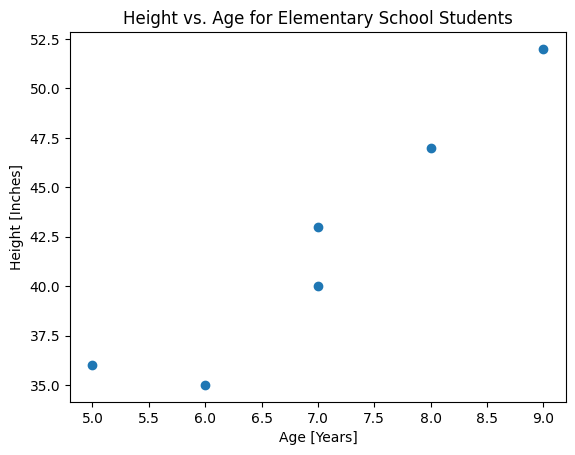

In [3]:
#First let's put our data in arrays
student_ages = [5,7,9,6,7,8] #in years
student_heights = [36,40,52,35,43,47] #in inches

#Then plot this data just like beforeL
plt.scatter(student_ages,student_heights)

#Now let's add some information to our plot to communicate to our audience what they are looking at
plt.title("Height vs. Age for Elementary School Students") #This is how we add a title to our plot
plt.xlabel("Age [Years]")
plt.ylabel("Height [Inches]")


**Fun with plotting:** There is a lot of flexibility in how we choose to represent our data in a plot using python. We can change things like the color and shape of our points to make our plot more informative or visually interesting.

Check out https://matplotlib.org/stable/users/explain/quick_start.html#quick-start for some of the many things you can do with plots in python. Below is a short example.

Text(0, 0.5, 'Height [Inches]')

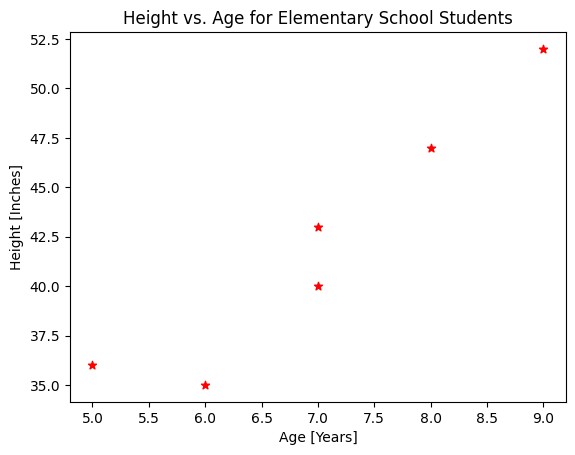

In [ ]:
#First let's put our data in arrays
student_ages = [5,7,9,6,7,8] #in years
student_heights = [36,40,52,35,43,47] #in inches

#Then plot this data just like before
plt.scatter(student_ages,student_heights,color='red',marker='*') ##THIS IS THE ONLY LINE WE CHANGED

#Now let's add some information to our plot to communicate to our audience what they are looking at
plt.title("Height vs. Age for Elementary School Students") #This is how we add a title to our plot
plt.xlabel("Age [Years]")
plt.ylabel("Height [Inches]")

**Try:** Go back to the previous cell and try to change the color and shape of the points on the graph yourself. Here's a list of colors you can choose from: https://matplotlib.org/stable/gallery/color/named_colors.html and a list of marker shapes: https://matplotlib.org/stable/api/markers_api.html.

# Plotting your lightcurve

In [4]:
import pandas as pd

In [6]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [9]:
sheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1ADcAbdKd8GNEtzwKVYZpYA7gKcyId1utt1qmy7hwdLg/edit?usp=drive_link').sheet1
lightcurve = pd.DataFrame(sheet.get_all_records())
lightcurve

,Flag,MJD,Filter,Mag,Mag_err
0,0,53616.35599,1,26.068,1.089
1,0,53616.35268,2,22.910,0.464
2,0,53616.35351,3,23.762,1.040
3,0,53616.35516,4,22.832,1.061
4,0,53616.35434,0,25.367,1.738
...,...,...,...,...,...
179,0,53705.25822,1,20.871,0.054
180,0,53705.25490,2,19.901,0.036
181,0,53705.25573,3,20.058,0.039
182,0,53705.25739,4,19.912,0.111


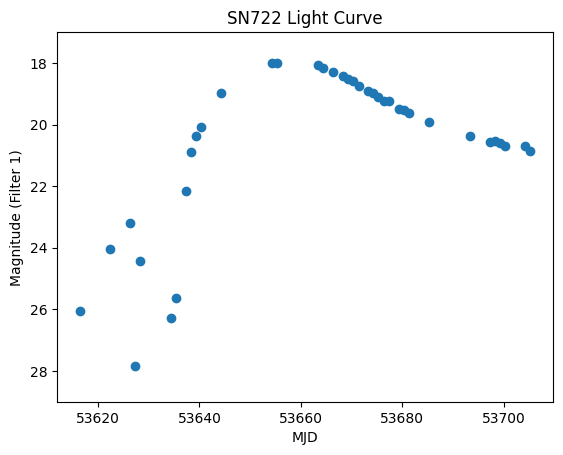

In [18]:
import numpy as np

Day = lightcurve['MJD']
Filt = lightcurve['Filter']
Mag = lightcurve['Mag']

locs_filt0 = np.where(Filt==1)
Day_filt0 = Day.iloc[locs_filt0]
Mag_filt0 = Mag.iloc[locs_filt0]

plt.scatter(Day_filt0,Mag_filt0)
plt.ylim(29,17)
plt.xlabel('MJD')
plt.ylabel('Magnitude (Filter 1)')
plt.title('SN722 Light Curve');

Now it's your turn to make a plot!

Make sure that your plot has:


*   Axis labels (What are you plotting?)
*   Units (Can be part of axis label)
*   Title or caption (Give the viewer context)


Other considerations:


*   Does it make sense to connect your points?
*   Play with formatting, e.g., what color and size are your points?
*   Adjust the scale - change the range of the x and y-axes to best showcase your data
*   Have fun! Check out this page (https://www.geeksforgeeks.org/matplotlib-practice-exercise-and-solutions/) for many of the cool things you can do with plots in python. Try a few out!






Text(0.5, 1.0, 'SN3901 Light Curve')

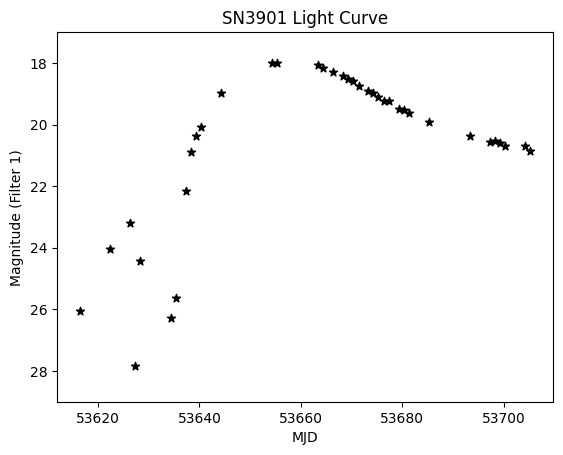

In [25]:
# Make your plot here!

plt.scatter(Day_filt0,Mag_filt0,color='black',marker='*')
plt.ylim(29,17)
plt.xlabel('MJD')
plt.ylabel('Magnitude (Filter 1)')
plt.title('SN3901 Light Curve')

## What about the other filters?

Filter simulator: https://astro.unl.edu/classaction/animations/light/filters.html

https://astro.unl.edu/naap/blackbody/animations/blackbody.html


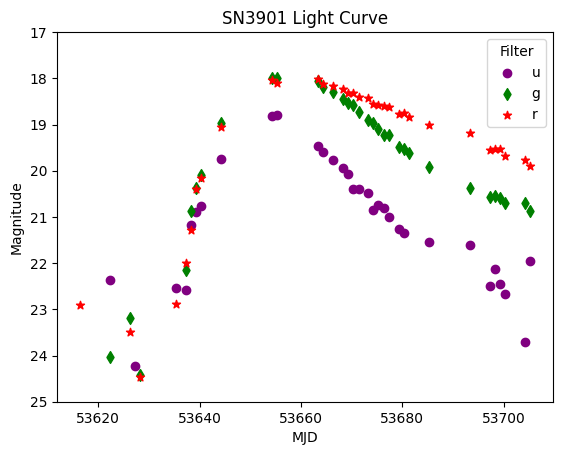

In [22]:
filters = [0,1,2]
filter_names= ['u','g','r','i','z']
colors=['purple','green','red','blue','pink']
markers = ['o','d','*','o','d']

for i in filters:
  locs_filt = np.where(Filt==i)
  Day_filt = Day.iloc[locs_filt]
  Mag_filt = Mag.iloc[locs_filt]
  plt.scatter(Day_filt,Mag_filt,label=filter_names[i],color=colors[i],marker=markers[i])

plt.ylim(25,17)
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.title('SN3901 Light Curve')
plt.legend(title='Filter')
plt.show()

## What about error bars?

It is important when we talk about measurements in science that we recognize that we cannot measure anything perfectly. There is a certain amount of uncertainty to each of our measurements that can depend on many different factors. Part of taking a measurement in science is determining how precise a measurement you can take and evaluating your potential sources of error.

<div>
<img src="https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2F1.bp.blogspot.com%2F_PNsxQN5jV0Y%2FTGWCzIk1rmI%2FAAAAAAAAAB0%2FDtmn7f0JN28%2Fs1600%2F1b.2.gif&f=1&nofb=1&ipt=3e51a03fc8e42493a8b37ecfeb9ceac982993e6067899cf3691162763b5dfb1c&ipo=images" width="500"/>
</div>

We can demonstrate this uncertainty in our measurement to our audience using error bars on our graph instead of just points. This shows the viewer the range of values that our measurement reasonably lies within.

In the case of our supernova data, we know the time of our observation very well, so the error bars in the x-direction would be very small. Instead, we will just add error bars on the magnitudes as there are many things that can effect these.

Run the cell below to see the plot of the green filter points with the additional errorbars. **Discuss**: What are potential sources of uncertainty in the measurement of supernova brightness?

Text(0.5, 1.0, 'SN3901 Light Curve')

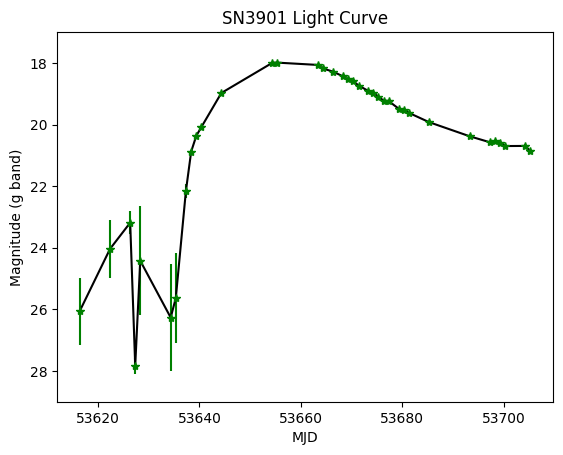

In [32]:
# Make your plot here!
Day = lightcurve['MJD']
Filt = lightcurve['Filter']
Mag = lightcurve['Mag']

locs_filt0 = np.where(Filt==1)
Day_filt0 = Day.iloc[locs_filt0]
Mag_err_filt0 = lightcurve['Mag_err'].iloc[locs_filt0]

plt.errorbar(Day_filt0,Mag_filt0,yerr=Mag_err_filt0,color='black',mfc='green',mec='green',
             ecolor='green',marker='*')
plt.ylim(29,17)
plt.xlabel('MJD')
plt.ylabel('Magnitude (g band)')
plt.title('SN3901 Light Curve')

## How far away is your supernova?

$m - M = -5 log_{10}(d)$

Review of magnitudes and distance: https://astro.unl.edu/classaction/animations/stellarprops/stellarmag.html

In [23]:
#Reminder: brighter = lower magnitude value
m_peak_apparent = 18.0 #Replace the question mark here with your brightest value observed in the green filter

m_peak_absolute = -19.5

In [24]:
def calculate_distance(absolute_magnitude,apparent_magnitude):
  #Given an absolute and an apparent magnitude, determine how far away the object is
  return pow(10, (apparent_magnitude - absolute_magnitude+5)/5)

distance_to_supernova = calculate_distance(m_peak_absolute,m_peak_apparent)

print("The distance to your supernova is {0:.3e} pc".format(distance_to_supernova))

The distance to your supernova is 3.162e+08 pc
